<a href="https://colab.research.google.com/github/Krithika-Devi/DS-BI-Tasks/blob/main/Task_6__DS_%26_BI_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**

---



## ***DATA SCIENCE & BUSINESS ANALYTICS*** 

---

### **TASK 6 - Prediction using Decision Tree Algorithm**

### **AUTHOR:** KRITHIKA DEVI CHANDRAN


# **Agenda**


*   Problem Statement
    *   Dataset & Objective
    *   Data Description
*   Load Data
*   Exploratory Data Analysis
*   Data Pre-Processing
*   Building ML Model
*   Building Decision Tree Classifier
*   Model Evaluation
*   Visualizing of Decision Tree


## **Problem Statement**


### **Dataset & Objective**

**Iris Dataset: https://bit.ly/3kXTdox**

From the given 'Iris' dataset, our objective is to use **Decision tree classfier** in order to predict the right class (Species) accordingly when we feed new data. 

> Decision tree classifier algorithm is a non-parametric **Supervised Learning method**, which does not depend upon probability distribution assumptions. The goal is to create a model that predicts the value of a target variable by learning simple decision rules infered from the data features.




### **Data Description**

Iris Dataset Characteristics is **Multivariate.** It contains four features (length and width of sepals and petals) of **150 samples** of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

**Attribute Information:**
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm
5. Species (Class):
   *   Iris-setosa
   *   Iris-versicolor
   *   Iris-virginica 




## **Load Data**

In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to plot the diagrams within the cells
%matplotlib inline

In [2]:
# Uploading dataset to colab
from google.colab import files
uploaded = files.upload()

print("Data imported successfully")

Saving Iris.csv to Iris (1).csv
Data imported successfully


In [3]:
# Reading uploaded csv data
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].unique() # viewing species unique values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Here, numerical value [0,1,2] is assigned to the classes ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] of Species in Iris data.

In [5]:
iris = iris.drop(columns=['Id'])
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,6.8,3.2,5.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris dataset has no null values.

In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
iris.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## **Exploratory Data Analysis**

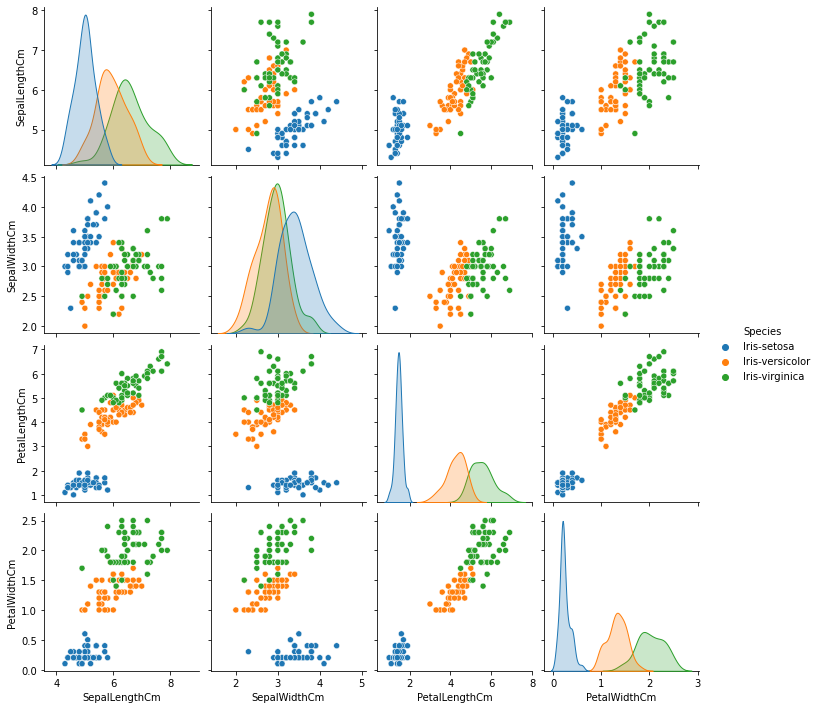

In [10]:
# Plotting the pair plot to visualize all attributes/variables at once
sns.pairplot(iris, hue='Species')
plt.show()

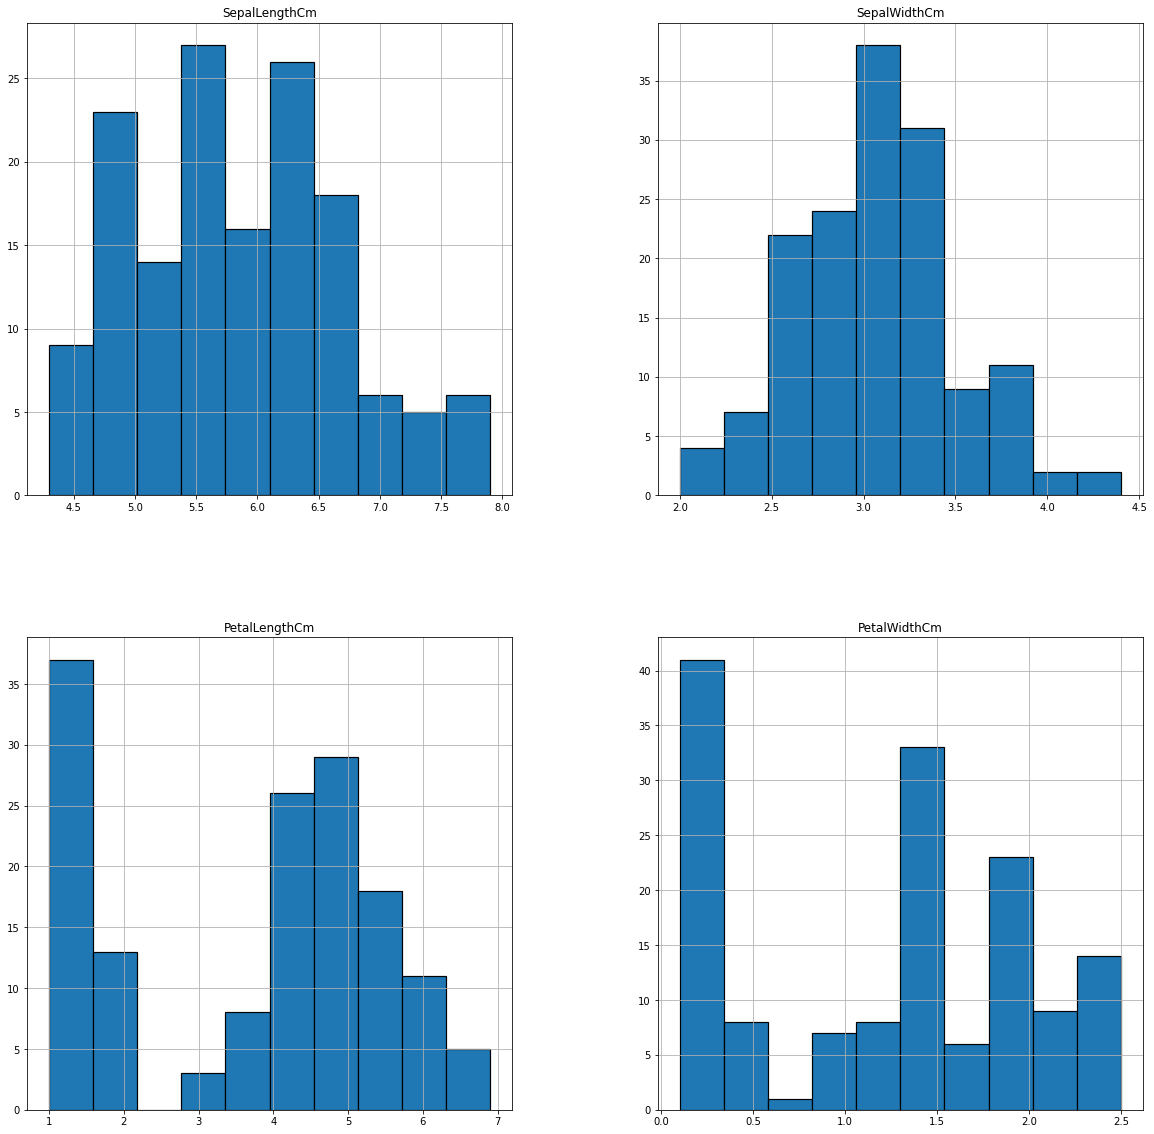

In [11]:
iris_features = iris.drop("Species", axis=1)
iris_features.hist(edgecolor='black', linewidth=1.2, figsize=(20,20))
plt.show()

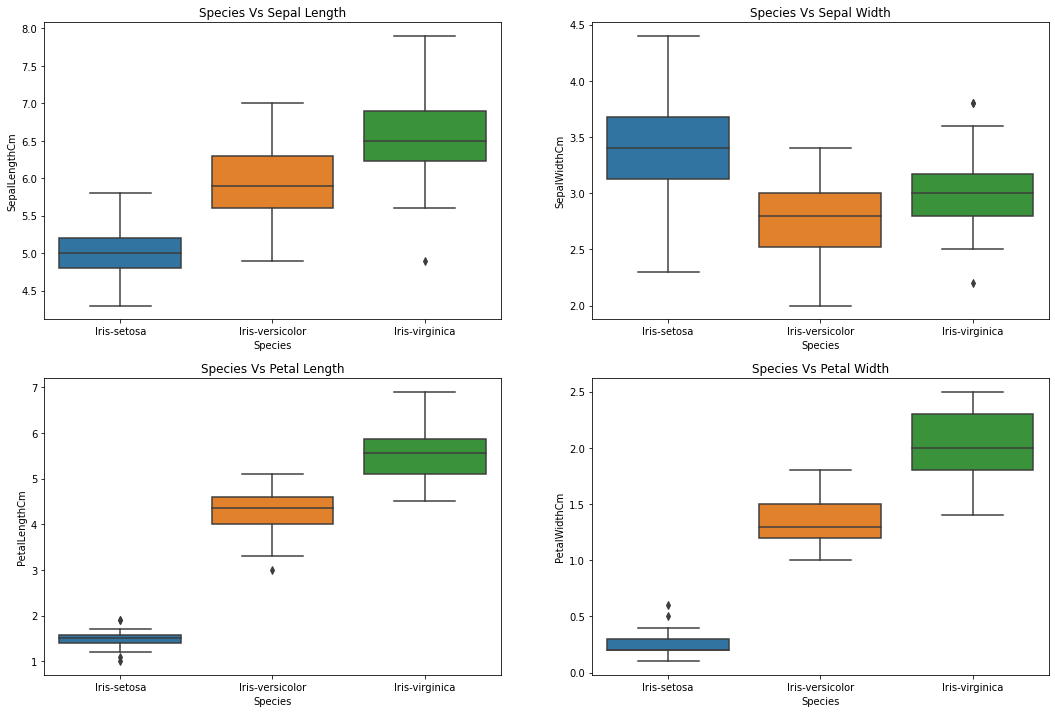

In [12]:
fig, ax = plt.subplots(2,2, figsize=(18,12))
sns.boxplot(x='Species', y = "SepalLengthCm", data=iris, ax=ax[0,0])
ax[0,0].set_title("Species Vs Sepal Length")
sns.boxplot(x='Species', y = "SepalWidthCm", data=iris, ax=ax[0,1])
ax[0,1].set_title("Species Vs Sepal Width")
sns.boxplot(x='Species', y = "PetalLengthCm", data=iris, ax=ax[1,0])
ax[1,0].set_title("Species Vs Petal Length")
sns.boxplot(x='Species', y = "PetalWidthCm", data=iris, ax=ax[1,1])
ax[1,1].set_title("Species Vs Petal Width")
plt.show()

In [13]:
# Viewing Correlations between variables
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


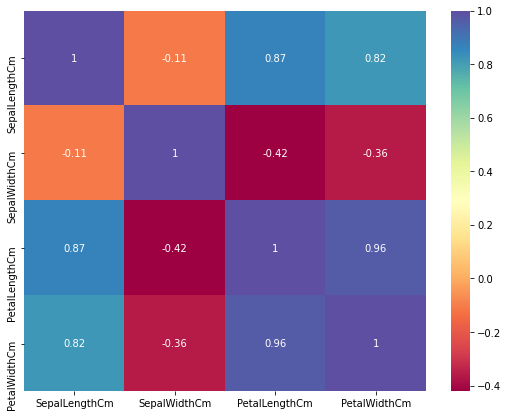

In [14]:
# Visualizing above Correlation matrix using heatmap
plt.figure(figsize=(9,7))
sns.heatmap(iris.corr(), annot = True, cmap = 'Spectral')
plt.show()

## **Data Pre-Processing**

In [15]:
# Encoding labels of Species in machine readable form 
# Label encoder assigns numerical value starting from 0 to each class of data

# Importing Label encoder from sklearn preprocessing library
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder()

iris['Species'] = label_encoded.fit_transform(iris['Species'])

iris['Species'].unique() 

array([0, 1, 2])

In [16]:
# Splitting training & test dataset 

X = iris.drop('Species', axis=1)
y = iris['Species']

## **Building ML Model**

In [17]:
# importing train_test_split from sklearn library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of the original iris data: ", X.shape)
print("Shape of the iris train data = ", X_train.shape)
print("Shape of the iris test data = ", X_test.shape)


Shape of the original iris data:  (150, 4)
Shape of the iris train data =  (120, 4)
Shape of the iris test data =  (30, 4)


In [18]:
print(f"Numbers of train instances by class: {np.bincount(y_train)}")
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

Numbers of train instances by class: [40 41 39]
Numbers of test instances by class: [10  9 11]


## **Building Decision Tree Classifier**



> A Decision Tree algorithm creates a set of rules at various decision levels such that a certain metric is optimized.

For Solving the attribute selection problem, using the default ***criterion - gini index***. 


In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
# Predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
# concat the predictions of Decision Tree classifier to the test dataset
y_test_pred = pd.DataFrame({'Species': y_test, 'Predicted Species':y_pred})
y_test_pred

,Species,Predicted Species
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


## **Model Evaluation**

In [22]:
from sklearn.metrics import accuracy_score
print('Training accuracy: ', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy: ', accuracy_score(y_test, model.predict(X_test)))

Training accuracy:  1.0
Test accuracy:  1.0


In [23]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0


In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.0

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

In [26]:
from sklearn.metrics import classification_report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Confusion Matrix:** A table used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

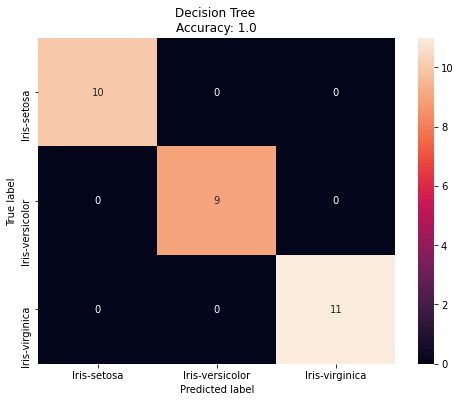

In [27]:
# Creating a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Transforming to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                     columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy: {}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Hence, we have an accuracy of 100% without any false positives & false negatives. Thus, if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## **Visualization of Decision Tree**



**Pseudocode:**
1. Place the best attribute of the dataset at the ***root*** of the tree.
2. Split the training set into ***subsets***. Subsets should be made in such a way that each subset contains data with the same value for an attribute.
3. Repeat step 1 and step 2 on each subset until we find ***leaf nodes*** in all the branches of the tree.
 
> ***For gini index, attributes are assumed to be continuous.***
     It is a metric to measure how often a randomly chosen element would be incorrectly identified. It means ***an attribute with lower gini index should be preferred.***





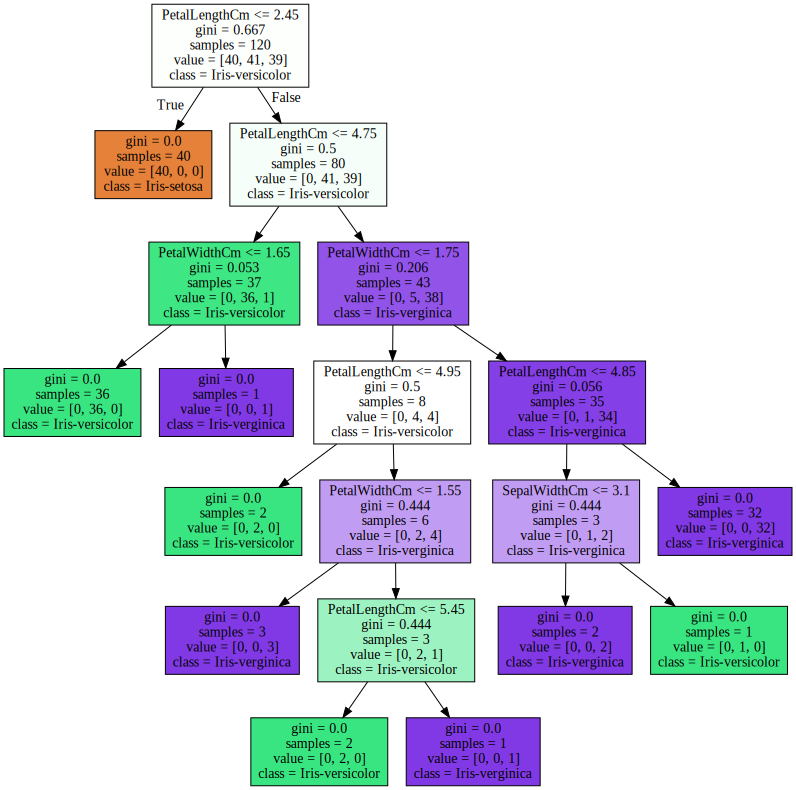

In [28]:
# importing libraries of tree and graph visualization
from sklearn import tree
import graphviz

# tree dot data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=['SepalLengthCm',	'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-verginica'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [29]:
from sklearn.tree import export_text

r = export_text(model, feature_names=['SepalLengthCm',	'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
print(r)

|--- PetalLengthCm <= 2.45
|   |--- class: 0
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: 1
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- class: 2
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalLengthCm <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- PetalLengthCm >  4.95
|   |   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |   |--- PetalLengthCm <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PetalLengthCm >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- PetalLengthCm >  4.85
|   |   |   |   |--- class: 2

